# Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv', sep='\t')
#separation by tab

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isna().sum()
#Check there is no missing values

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()
#basic summary of all columns

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df['label'].value_counts()/ (len(df))*100
#what percentage is ham, what percentage is spam

ham     86.593683
spam    13.406317
Name: label, dtype: float64

takeaway: inbalanced data set
1. either collect more data from spam
2. select randomly from ham so that two percentages are about the same 

In [9]:
df['label'].value_counts()
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']
ham = ham.sample(spam.shape[0])
#grab randomly 

In [10]:
ham.shape, spam.shape
#now they have the same shape 

((747, 4), (747, 4))

In [11]:
data = ham.append(spam, ignore_index=True)

In [12]:
data[0:10]

,label,message,length,punct
0,ham,Pls give her the food preferably pap very slow...,147,4
1,ham,Jus finish watching tv... U?,28,4
2,ham,Also where's the piece,22,1
3,ham,TODAY is Sorry day.! If ever i was angry with ...,148,7
4,ham,"Hi, Mobile no. &lt;#&gt; has added you in th...",158,10
5,ham,"Yeah, probably but not sure. Ilol let u know, ...",124,6
6,ham,Lol yep did that yesterday. Already got my fir...,101,3
7,ham,X2 &lt;#&gt; . Are you going to get that,41,6
8,ham,True. It is passable. And if you get a high sc...,119,5
9,ham,"Yeah I should be able to, I'll text you when I...",65,3


In [14]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

# Basic Visualization 

## compare the length of each record 
spam seems to have a longer length

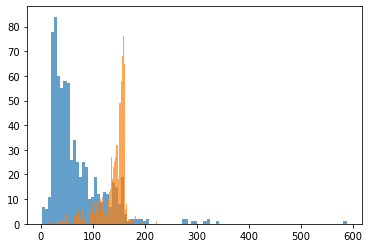

In [15]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

# compare the punctuation of each record¶
not much difference

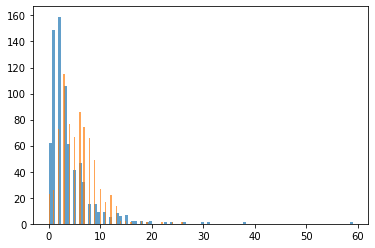

In [16]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

# Build Models

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], 
                                                     test_size = 0.3, random_state =0, shuffle = True)

In [27]:
X_train[0:10]

1438      You have 1 new message. Please call 08715205273
431     Takin a shower now but yeah I'll leave when I'...
194                     Yay can't wait to party together!
240                And how you will do that, princess? :)
1309    Had your mobile 11 months or more? U R entitle...
742                               Me fine..absolutly fine
1430    Free video camera phones with Half Price line ...
1064     You have 1 new message. Please call 08718738034.
981     For ur chance to win a £250 cash every wk TXT:...
49      Hello! Good week? Fancy a drink or something l...
Name: message, dtype: object

In [28]:
#convert text data into numbers while preserving the semantic relationship between the data

## Random Forest

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [31]:
#create a pipline object that pass both tfidf and random forest object
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [32]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [33]:
y_pred = classifier.predict(X_test)

In [35]:
#y_test, y_pred

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)
#percentage that got right 

0.9420935412026726

In [38]:
confusion_matrix(y_test, y_pred)
#         predicated ham predicated spam
#real ham
#real spam

array([[222,   5],
       [ 21, 201]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



## SVM

In [40]:
from sklearn.svm import SVC

In [41]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [42]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [43]:
y_pred = svm.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.9376391982182628

In [45]:
confusion_matrix(y_test, y_pred)

array([[220,   7],
       [ 21, 201]])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94       227
        spam       0.97      0.91      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449

